# **PCA**







#Step 1 : import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#Step 2: Importing the data set




In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer(as_frame=True)
df = cancer.frame
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 4: Feature Scaling







Ensures that all features are on a similar scale, which is important for PCA to work effectively.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)
# # train set
# X_mean_train = X_train.mean()

# X_std_train = X_train.std()

# Z_train = (X_train - X_mean_train) / X_std_train
# Z_train

#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [ ]:
# train set
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(Z_train)
pca_tranformed_train = pca.transform(Z_train)

df_pca_train = pd.DataFrame(pca_tranformed_train,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(4)])
print(df_pca_train)


# test set
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(Z_test)
pca_tranformed_test = pca.transform(Z_test)

df_pca_test = pd.DataFrame(pca_tranformed_test,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(4)])
print(df_pca_test)

          PC1       PC2       PC3       PC4
0    4.244903  9.131428  1.504262 -0.650982
1    9.053755  0.475310 -3.198215  0.704403
2   -2.275374  3.278471  2.816370 -0.268242
3   -2.510453  0.743743 -0.736034  2.524633
4   -2.302848  2.665155  1.192885 -1.268602
..        ...       ...       ...       ...
450 -0.368252  7.231415  3.805657 -2.364698
451 -0.686605  1.781220 -0.693044  0.586677
452 -4.500654 -3.067808 -0.031045 -0.444543
453  0.728285  0.426287 -2.730932  0.529393
454 -3.403925 -1.330388 -0.149210  1.804540

[455 rows x 4 columns]
          PC1       PC2       PC3       PC4
0   -0.912697  0.678834 -0.589601  0.203657
1    2.852678 -4.166325 -0.764560 -1.015199
2    1.427425 -0.659280 -1.256863 -0.212559
3   -1.171946  2.198449  0.207094  0.176720
4   -2.002476  1.897064  0.346958 -0.764893
..        ...       ...       ...       ...
109 -2.128712 -2.692747 -1.122120  0.739723
110  1.293542 -1.791824 -0.100181 -1.735384
111 -2.612701  0.480497 -1.191286 -0.347645
112 -0.6

#Step 6: Fitting Logistic Regression To the training set




In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(df_pca_train, y_train)

LogisticRegression()

#Step 7: Predicting the test set result




In [ ]:
y_pred = lr.predict(df_pca_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.9385964912280702


#Step 8: Making the confusion matrix




In [ ]:
print(confusion_matrix(y_test, y_pred))

[[39  4]
 [ 3 68]]


#Step 9: Predicting the training set result




In [ ]:
y_pred_train = lr.predict(df_pca_train)

acc = accuracy_score(y_train, y_pred_train)
print(acc)

0.967032967032967


#Step 10: Visualizing the Test set results




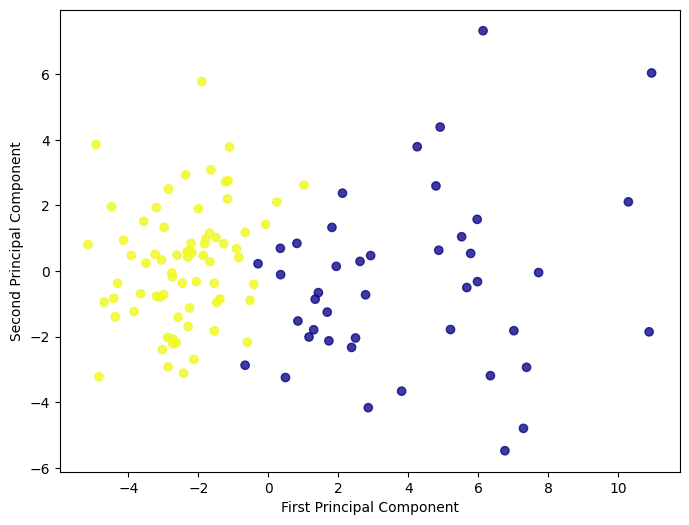

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(pca_tranformed_test[:, 0], pca_tranformed_test[:, 1],
            c=y_test, alpha=0.8,
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()